In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy.stats import mode
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
plt.style.use("ggplot")
import re

In [49]:
train_df = pd.read_csv('../Data/multi-label-classification-data/train.csv')
test_df = pd.read_csv('../Data/multi-label-classification-data/test.csv')
submission = pd.read_csv('../Data/multi-label-classification-data/sample_submission.csv')

In [50]:
def data_hist(df, col, row, n):
    plt.figure(figsize=(20, 20))
    cols = df.columns
    for i in range(len(cols)):
        plt.subplot(col, row, i+1)
        plt.title(cols[i], fontsize=20)
        if len(df[cols[i]].unique()) > n:
            plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        else:
            temp = df[cols[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

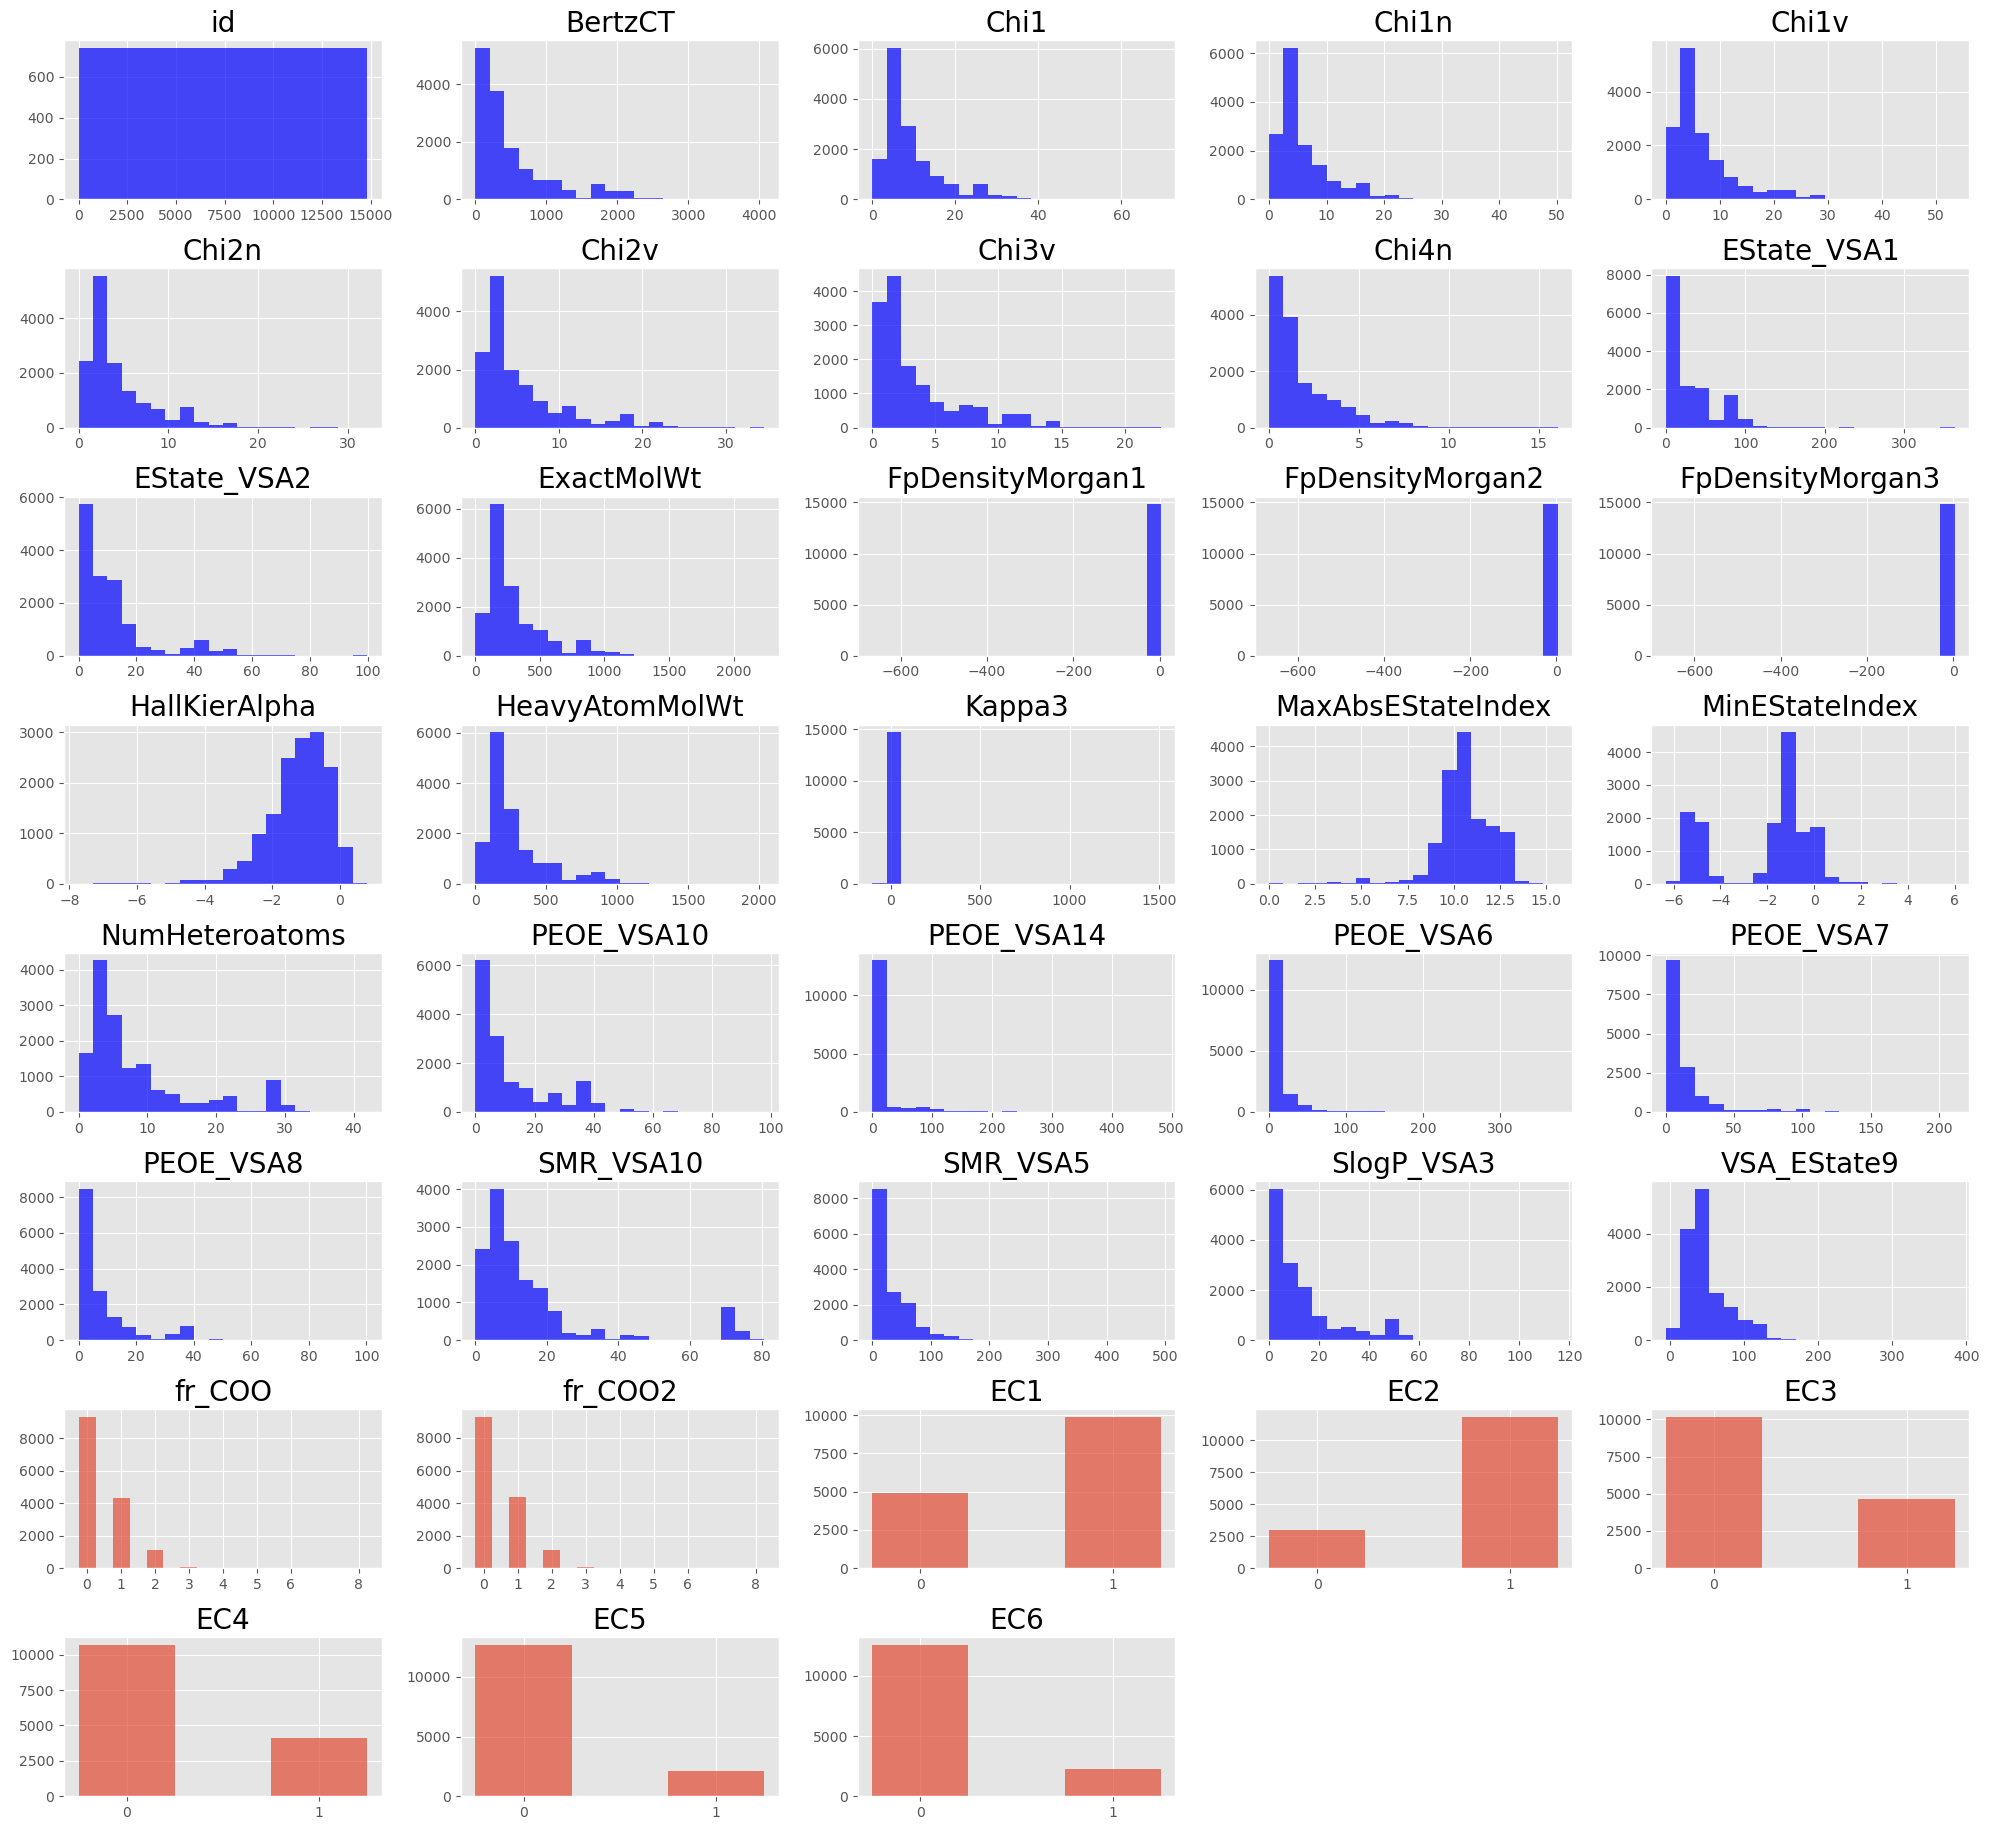

In [51]:
data_hist(train_df, 8, 5, 20)

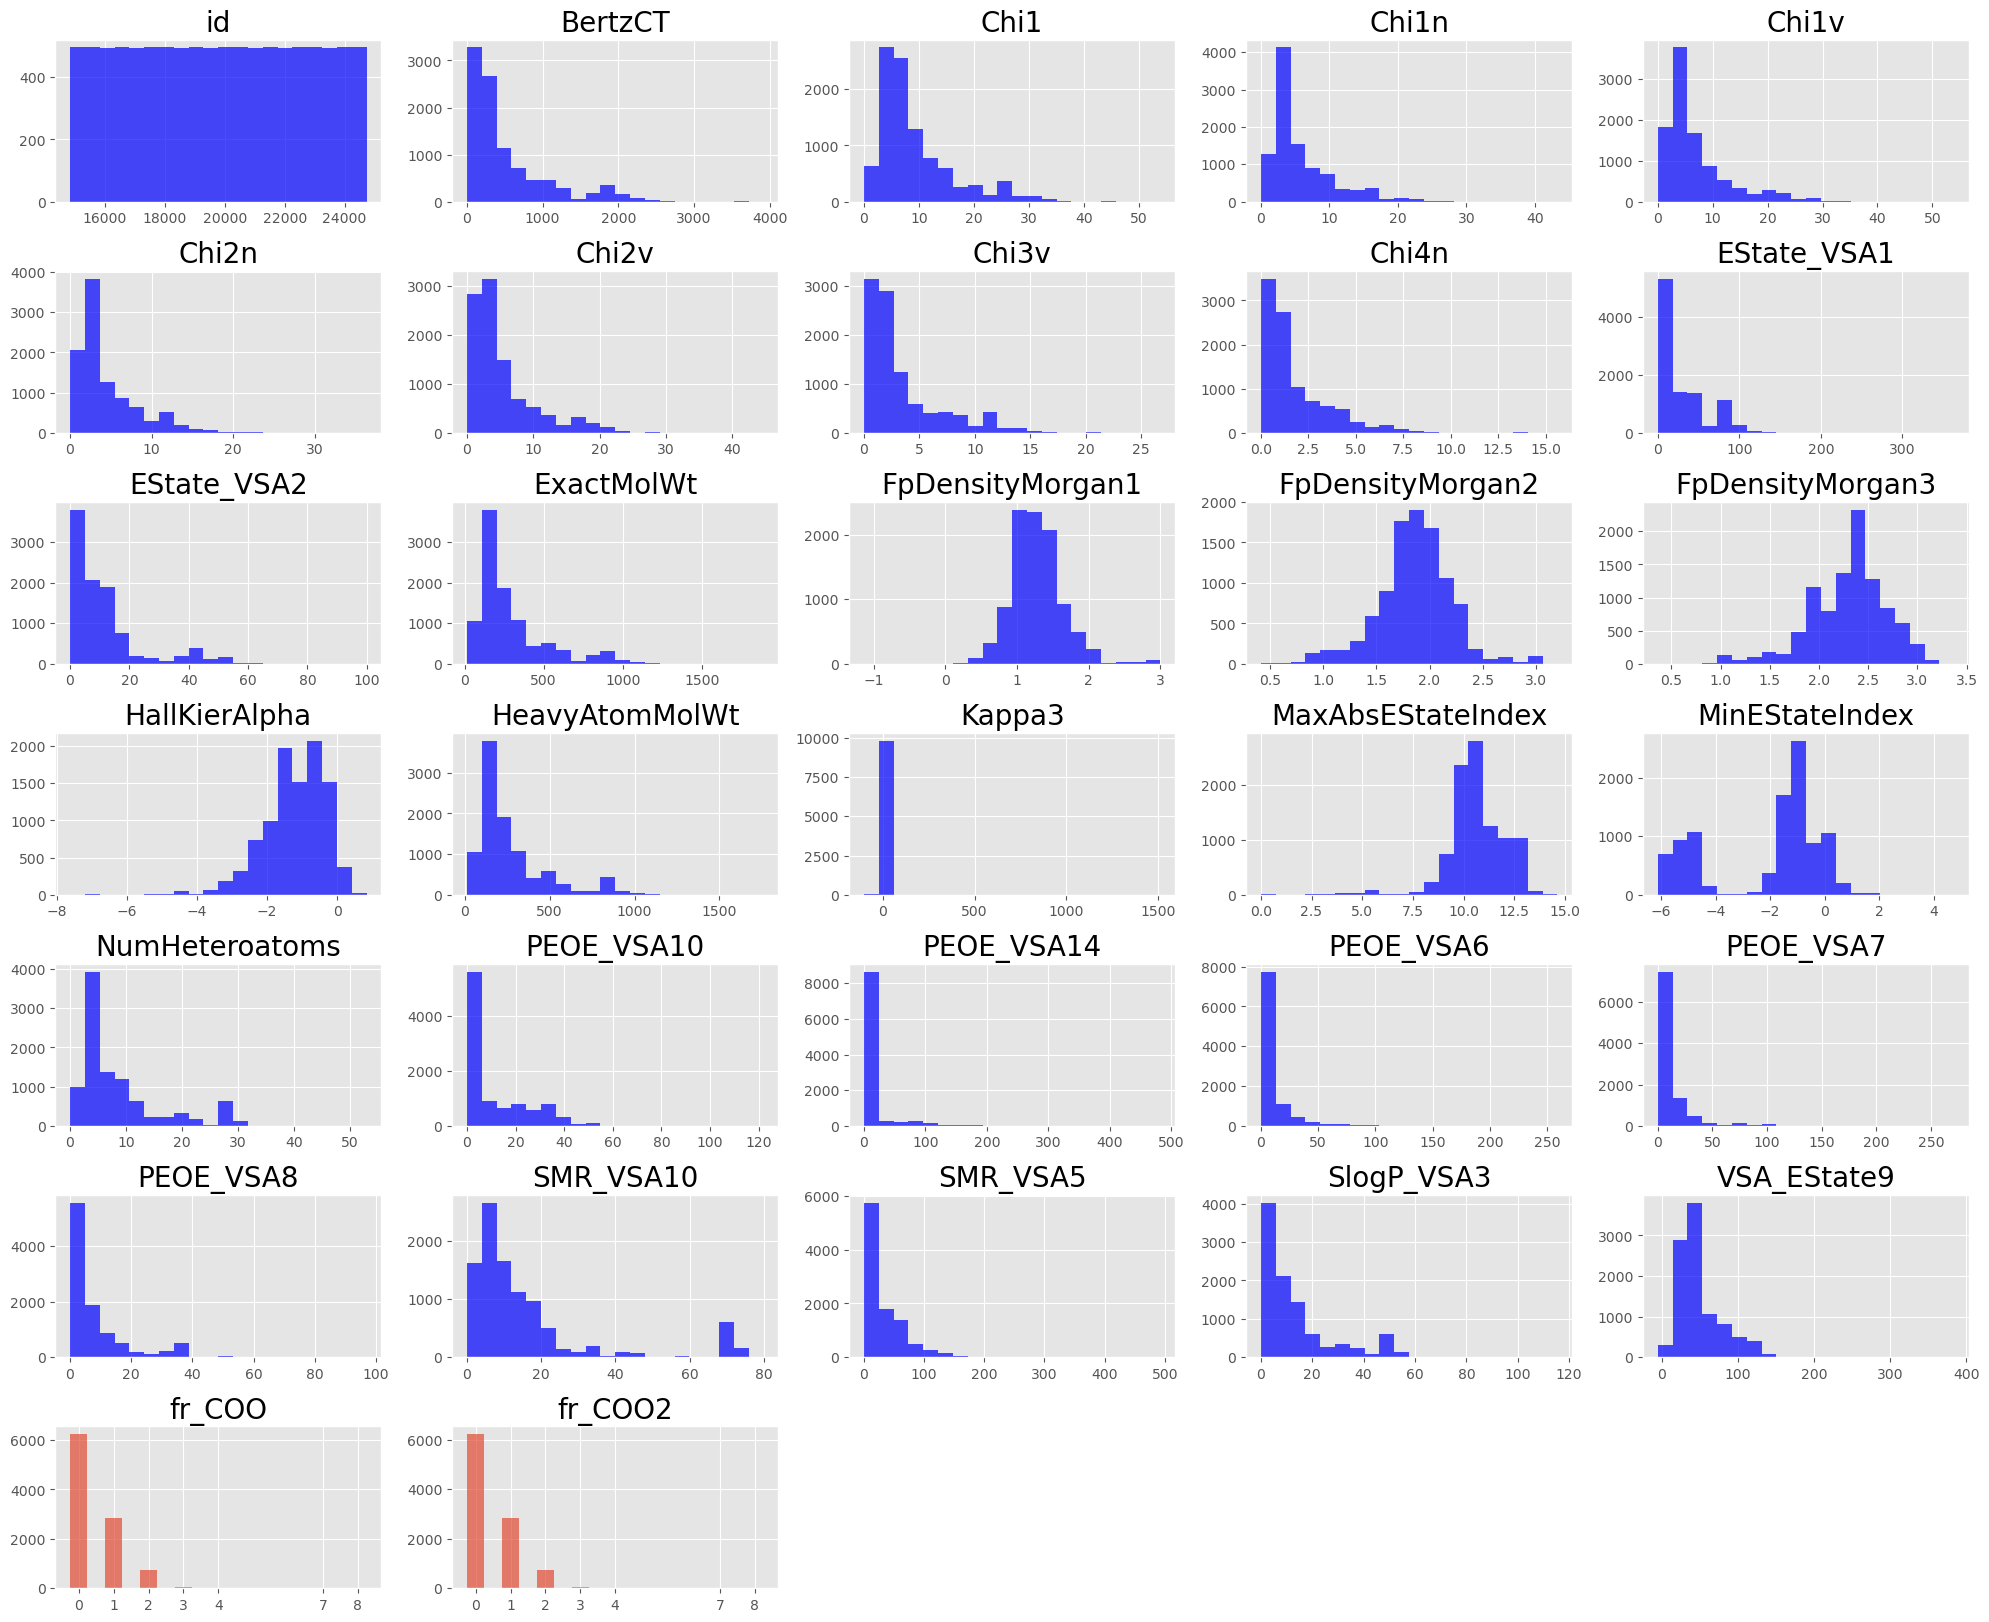

In [52]:
data_hist(test_df, 8, 5, 20)

In [53]:
train_df.shape

(14838, 38)

In [54]:
test_df.shape

(9893, 32)

In [72]:
train_df.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

In [65]:
label_df = train_df[['EC1','EC2','EC3','EC4','EC5','EC6']]

In [66]:
label_df.to_csv('../Data/multi-label-classification-data/label.csv')

In [73]:
train_df_no = train_df.drop(['EC1','EC2','EC3','EC4','EC5','EC6'], axis=1)
train_df_no.to_csv('../Data/multi-label-classification-data/train_process.csv')

<Axes: >

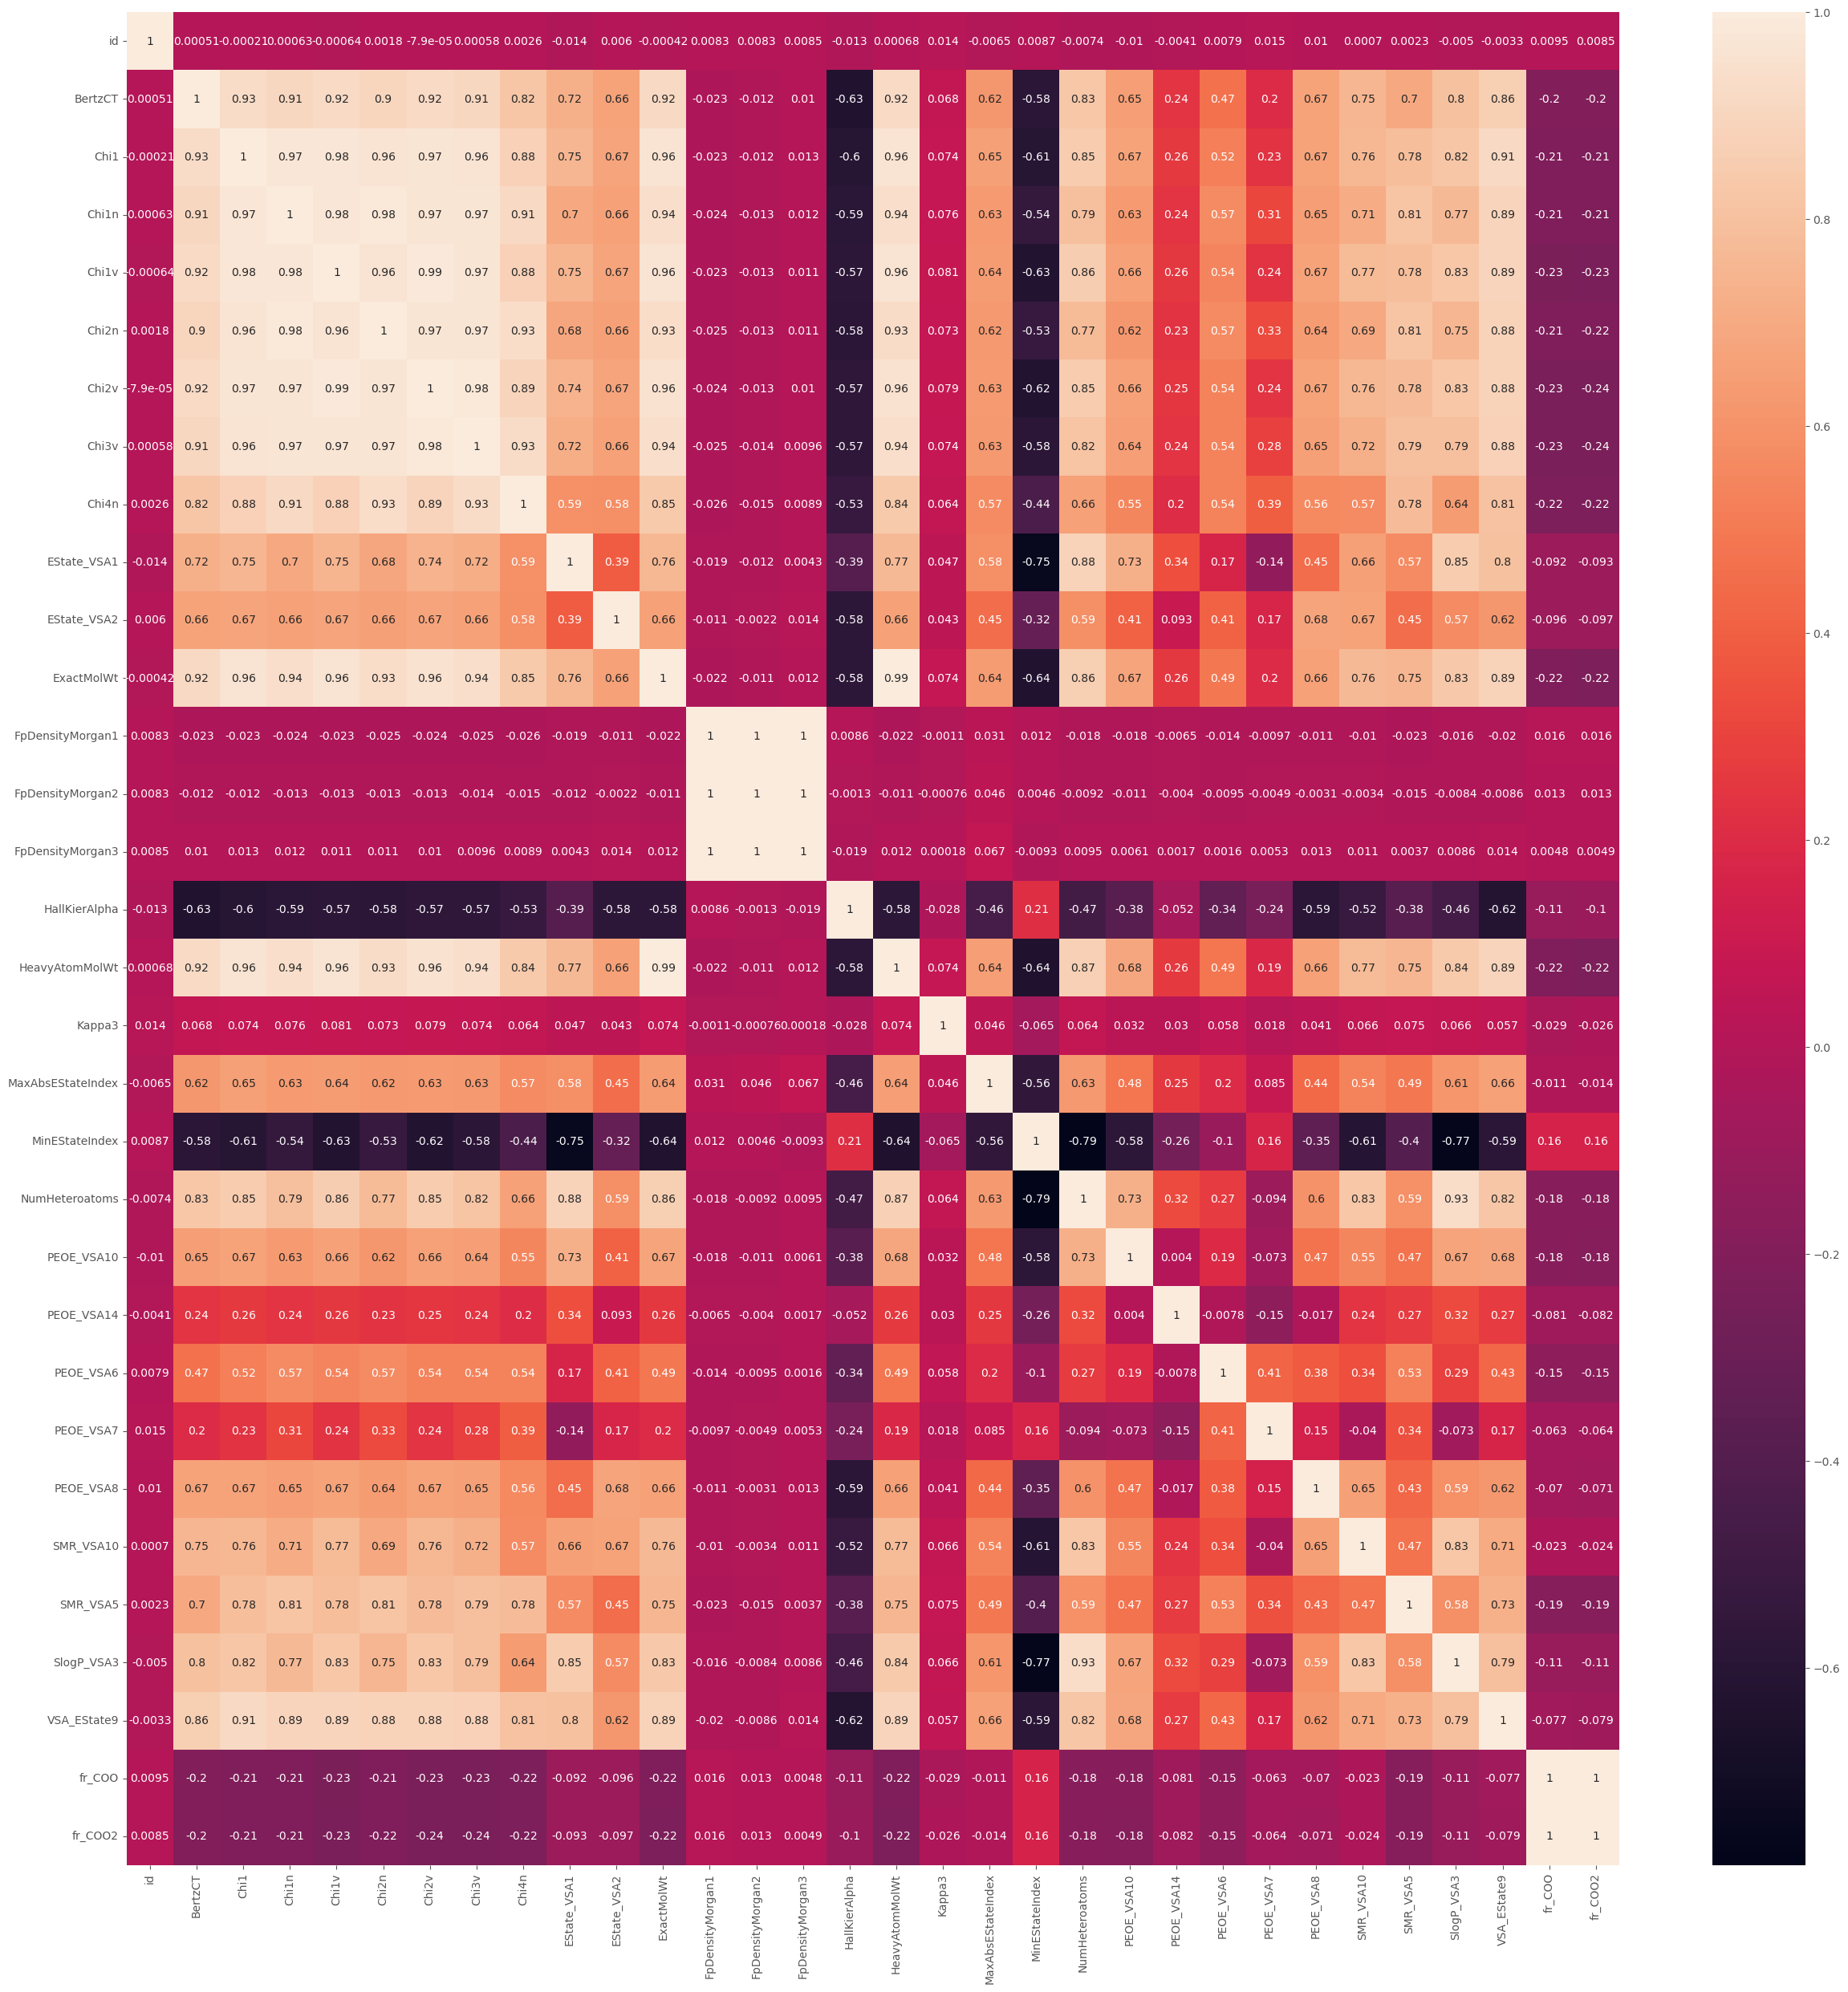

In [68]:

plt.figure(figsize=(30,30))
sns.heatmap(train_df_no.corr(), annot=True)
